# Russell Rebalance Strategy

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

import activity as act
import available as avb
import utils as self_utils
from quantified_strategies import utils

In [2]:
START = dt.date(2020, 1, 1)
END = dt.date.today()

## Rules

1. Buy on the close of the first trading day after the 23rd of June.
2. Sell on the close of the first trading day of July.

In [3]:
TICKER = "IWM"

In [4]:
data = utils.get_data(ticker=TICKER, columns="Adj Close").to_frame(name="asset")
data = data.loc[(data.index.date >= START) & (data.index.date <= END)]
data = self_utils.run(data=data, full=True)

In [5]:
trade_ret = data.dropna(subset="strat_ret").groupby("trade_number")["strat_ret"].apply(lambda ret: utils.get_cumulative_return(returns=ret, total=True))
trade_ret.index = trade_ret.index.map(data.loc[data["enter_flag"]].reset_index().set_index("trade_number")["Date"].to_dict())
trade_ret = trade_ret.loc[~trade_ret.index.isna()]
trade_ret.head(5)

trade_number
2020-06-23   -0.004196
2021-06-23    0.002318
2022-06-23    0.017665
2023-06-23    0.028853
Name: strat_ret, dtype: float64

## Plot Strategy Results

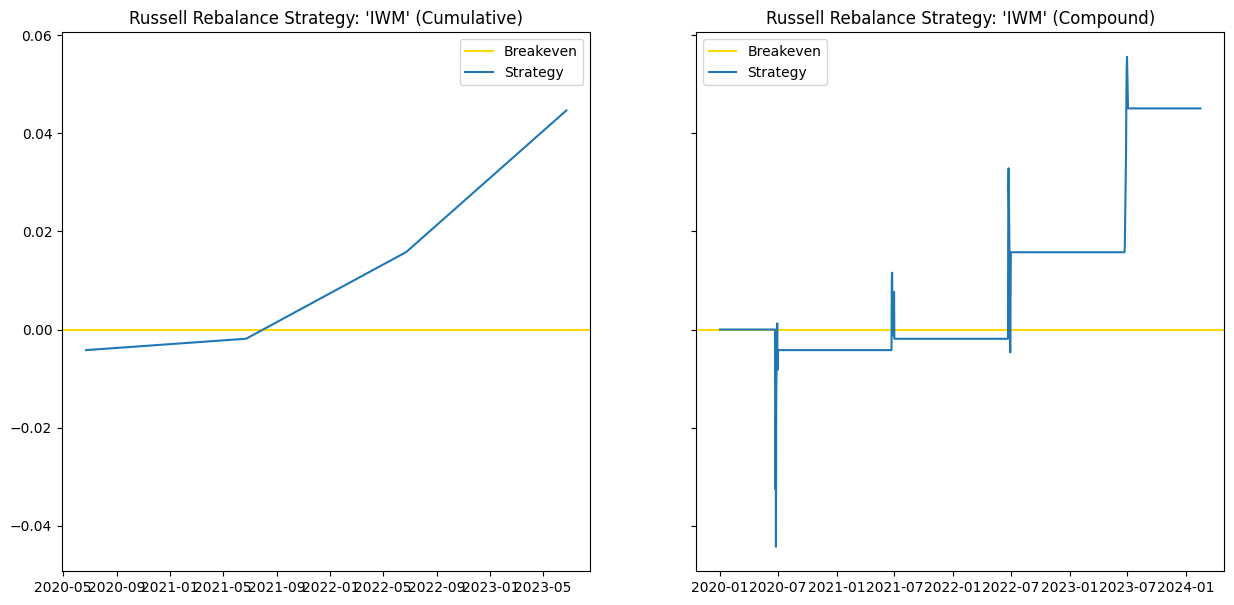

In [6]:
fig, ax = plt.subplots(ncols=2, sharey=1, figsize=(15, 7))

ax[0].axhline(y=0, label="Breakeven", color="gold")
ax[1].axhline(y=0, label="Breakeven", color="gold")

ax[0].plot(trade_ret.cumsum(), label="Strategy")
ax[0].set_title(f"Russell Rebalance Strategy: {TICKER!r} (Cumulative)")
ax[0].legend(loc="best")

ax[1].plot(data["cum_strat_ret"], label="Strategy")
ax[1].set_title(f"Russell Rebalance Strategy: {TICKER!r} (Compound)")
ax[1].legend(loc="best")


plt.show()

## Describe Strategy Results

In [7]:
utils.describe(returns=data["strat_ret"], pos=data["active"], daily=True, asset=TICKER)

Asset                           IWM
Start                    2020-01-02
End                      2024-02-16
Mean Return                0.16815%
Total Return                  4.51%
Median Return              0.28707%
1st Quartile              -0.87099%
3rd Quartile               1.18049%
Std Dev Return             1.48628%
CAGR                     15.750 bps
Trade CAGR                   0.552%
Ann. CAGR                   48.674%
Activity Ratio                2.69%
Number of Trades                  8
Average Hold Period       3.50 Days
Daily Sharpe Ratio           0.1131
Ann. Sharpe Ratio            0.2948
Daily Sortino Ratio          0.1828
Ann. Sortino Ratio           0.4764
Daily Calmar Ratio           1.2409
Hit Ratio                    64.29%
Profit Factor                 1.34x
MDD                          -3.63%
MDD Start                2022-06-24
MDD Bottom               2022-06-29
MDD End                  2023-06-27
MDD Decline Duration         4 Days
MDD Recovery Duration       

In [8]:
utils.describe(returns=trade_ret, daily=False, asset=TICKER)

C:\Users\tomw1\PycharmProjects\quantified_strategies\quantified_strategies\utils.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  calmar_ratio = tot_ret / drawdown_statistics["max_drawdown"]


Asset                            IWM
Start                     2020-06-23
End                       2023-06-23
Mean Return                 1.11599%
Total Return                   4.51%
Median Return               0.99913%
1st Quartile               -0.09391%
3rd Quartile                2.32589%
Std Dev Return              1.49371%
CAGR                     110.772 bps
Trade CAGR                       N/A
Ann. CAGR                        N/A
Activity Ratio               100.00%
Number of Trades                 0.0
Average Hold Period        4.00 Days
Daily Sharpe Ratio            0.7471
Ann. Sharpe Ratio            11.8602
Daily Sortino Ratio              NaN
Ann. Sortino Ratio               NaN
Daily Calmar Ratio              -inf
Hit Ratio                     75.00%
Profit Factor                 11.64x
MDD                            0.00%
MDD Start                 2020-06-23
MDD Bottom                2020-06-23
MDD End                   2021-06-23
MDD Decline Duration          1 Days
M